In [1]:
from dateutil import parser
from datetime import datetime
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'png'
%matplotlib inline


with open('turnstiles_full.pickle', 'rb') as file:
    mta = pickle.load(file)
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,00:00:00,REGULAR,7089463,2401758,2019-06-08 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,04:00:00,REGULAR,7089491,2401764,2019-06-08 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,08:00:00,REGULAR,7089511,2401807,2019-06-08 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,12:00:00,REGULAR,7089598,2401889,2019-06-08 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,16:00:00,REGULAR,7089801,2401946,2019-06-08 16:00:00


In [2]:
with open('turnstiles_by_day.pickle', 'rb') as file:
    by_day = pickle.load(file)
by_day.head()

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE,PREV_ENTRIES,PREV_EXITS,weekday,daily_entries,daily_exits
1,A002,R051,02-00-00,59 ST,7027457,2382455,2019-04-20,7026702.0,2382234.0,Saturday,755.0,221.0
2,A002,R051,02-00-00,59 ST,7028053,2382642,2019-04-21,7027457.0,2382455.0,Sunday,596.0,187.0
3,A002,R051,02-00-00,59 ST,7029313,2383025,2019-04-22,7028053.0,2382642.0,Monday,1260.0,383.0
4,A002,R051,02-00-00,59 ST,7030821,2383462,2019-04-23,7029313.0,2383025.0,Tuesday,1508.0,437.0
5,A002,R051,02-00-00,59 ST,7032351,2383896,2019-04-24,7030821.0,2383462.0,Wednesday,1530.0,434.0


In [3]:
#create column for sum of daily entries and exits

by_day['total_traffic'] = by_day['daily_entries'] + by_day['daily_exits']
by_day.head()

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE,PREV_ENTRIES,PREV_EXITS,weekday,daily_entries,daily_exits,total_traffic
1,A002,R051,02-00-00,59 ST,7027457,2382455,2019-04-20,7026702.0,2382234.0,Saturday,755.0,221.0,976.0
2,A002,R051,02-00-00,59 ST,7028053,2382642,2019-04-21,7027457.0,2382455.0,Sunday,596.0,187.0,783.0
3,A002,R051,02-00-00,59 ST,7029313,2383025,2019-04-22,7028053.0,2382642.0,Monday,1260.0,383.0,1643.0
4,A002,R051,02-00-00,59 ST,7030821,2383462,2019-04-23,7029313.0,2383025.0,Tuesday,1508.0,437.0,1945.0
5,A002,R051,02-00-00,59 ST,7032351,2383896,2019-04-24,7030821.0,2383462.0,Wednesday,1530.0,434.0,1964.0


In [4]:
#Get total entry and exit traffic for each station
station_total = by_day.groupby('STATION')['total_traffic']\
.sum().reset_index().sort_values('total_traffic', ascending=False)

#Show the stations with the most total traffic
pd.options.display.float_format = '{:,.0f}'.format
station_total.head(10)

,STATION,total_traffic
61,34 ST-PENN STA,"15,308,823"
232,GRD CNTRL-42 ST,"12,880,149"
59,34 ST-HERALD SQ,"10,874,560"
14,14 ST-UNION SQ,"9,625,476"
352,TIMES SQ-42 ST,"9,468,584"
46,23 ST,"9,135,850"
225,FULTON ST,"8,360,167"
68,42 ST-PORT AUTH,"8,323,960"
110,86 ST,"7,606,546"
9,125 ST,"6,712,682"


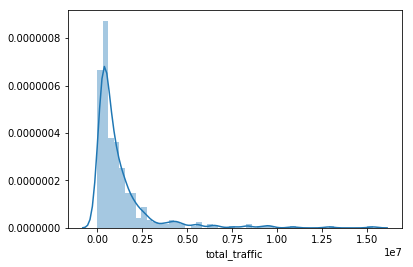

In [5]:
#Distribution and KDE of total traffic per station
sns.distplot(station_total['total_traffic'])

In [6]:
#Get list of stations with most traffic
top_stations = station_total.reset_index().iloc[:9,:]
list_of_stations = top_stations.STATION.tolist()
print(list_of_stations)

['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', '14 ST-UNION SQ', 'TIMES SQ-42 ST', '23 ST', 'FULTON ST', '42 ST-PORT AUTH', '86 ST']


In [7]:
#Filter down dataframe to include only the stations with most traffic
top_by_day = by_day[by_day['STATION'].isin(list_of_stations)]

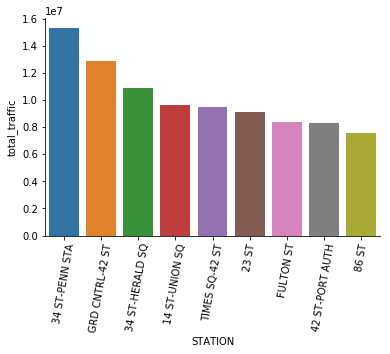

In [8]:
#Get total entry and exit traffic for top stations
top_total = top_by_day.groupby('STATION')['total_traffic']\
.sum().reset_index().sort_values('total_traffic', ascending=False)

#Show the stations with the most total traffic
bar = sns.barplot(x='STATION', y='total_traffic', data=top_total)
bar.set_xticklabels(bar.get_xticklabels(),rotation=80)
sns.despine()

In [9]:
#Sort stations by total traffic for heatmap
top_by_day.STATION = pd.Categorical(top_by_day.STATION,categories=list_of_stations)
tp = top_by_day.sort_values('STATION')

/home/rob/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [10]:
#Sort weekdays so that they display in correct order for heatmap
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
tp.weekday = pd.Categorical(tp.weekday,categories=weekdays)

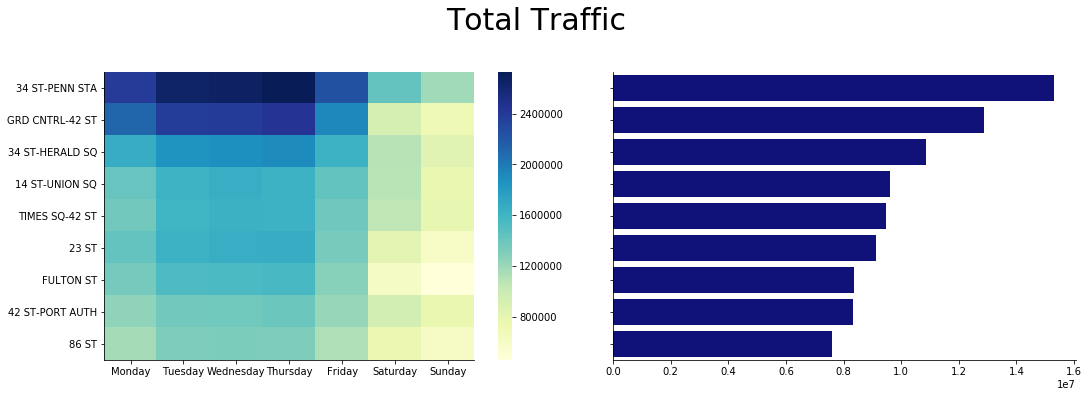

In [11]:
#Create heatmap of total traffic, separated by stations and weekday with totals

top_weekday = tp.groupby(['STATION','weekday'])['total_traffic'].sum().reset_index()
d = top_weekday.pivot("STATION", "weekday", "total_traffic")

fig, ax = plt.subplots(figsize=(15, 5), ncols=2, nrows=1)

plt.subplots_adjust(
    left    =  0.1, 
    bottom  =  0, 
    right   =  1, 
    top     =  .8, 
    wspace  =  0.1, 
    hspace  =  1)

plt.suptitle("Total Traffic", size=30)

sns.heatmap(d, cmap="YlGnBu", ax=ax[0])
#sns.barplot(, cmap="YlGnBu", ax=ax[1])
sns.barplot(y='STATION', x='total_traffic',color='darkblue', data=top_total,ax=ax[1]).set(yticklabels=[])
sns.despine()

ax[0].set_xlabel(None)
ax[1].set_xlabel(None)
ax[0].set_ylabel(None)
ax[1].set_ylabel(None)

plt.savefig('Total_Traffic_Heatmap.png', bbox_inches='tight')